In [1]:
import pandas as pd

In [43]:
import subprocess

pathToScenario = "experiments/simple_experiment.json"
subprocess.run(["bin/OpenDCExperimentRunner.bat", "--experiment-path", pathToScenario])

CompletedProcess(args=['bin/OpenDCExperimentRunner.bat', '--experiment-path', 'experiments/simple_experiment.json'], returncode=1)

In [3]:
france = pd.read_csv('intermittent-renewables-production-france.csv')
france

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 20:00:00+02:00,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23 07:00:00+02:00,2020-07-23,07:00:00,08:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23 16:00:00+02:00,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23 19:00:00+02:00,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23 23:00:00+02:00,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July
...,...,...,...,...,...,...,...,...,...
59801,2023-06-30 06:00:00+02:00,2023-06-30,06:00:00,07:00:00,Solar,55.0,181,Friday,June
59802,2023-06-30 13:00:00+02:00,2023-06-30,13:00:00,14:00:00,Solar,4554.0,181,Friday,June
59803,2023-06-30 14:00:00+02:00,2023-06-30,14:00:00,15:00:00,Solar,4589.0,181,Friday,June
59804,2023-06-30 16:00:00+02:00,2023-06-30,16:00:00,17:00:00,Solar,4173.0,181,Friday,June


In [6]:
france.sort_values(by="Date and Hour", inplace=True)
france

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
613,2020-01-01 00:00:00+01:00,2020-01-01,00:00:00,01:00:00,Solar,0.0,1,Wednesday,January
172,2020-01-01 00:00:00+01:00,2020-01-01,00:00:00,01:00:00,Wind,3549.0,1,Wednesday,January
616,2020-01-01 01:00:00+01:00,2020-01-01,01:00:00,02:00:00,Solar,0.0,1,Wednesday,January
11231,2020-01-01 01:00:00+01:00,2020-01-01,01:00:00,02:00:00,Wind,2952.0,1,Wednesday,January
1460,2020-01-01 02:00:00+01:00,2020-01-01,02:00:00,03:00:00,Solar,0.0,1,Wednesday,January
...,...,...,...,...,...,...,...,...,...
58948,2023-06-30 21:00:00+02:00,2023-06-30,21:00:00,22:00:00,Wind,4857.0,181,Friday,June
59521,2023-06-30 22:00:00+02:00,2023-06-30,22:00:00,23:00:00,Solar,1.0,181,Friday,June
58950,2023-06-30 22:00:00+02:00,2023-06-30,22:00:00,23:00:00,Wind,5140.0,181,Friday,June
58947,2023-06-30 23:00:00+02:00,2023-06-30,23:00:00,24:00:00,Wind,6135.0,181,Friday,June


In [9]:
solar = france[france['Source']=='Solar']
wind = france[france['Source'] == 'Wind']

In [11]:
solar_filtered = solar[['Date and Hour', 'Production']]
wind_filtered = wind[['Date and Hour', 'Production']]

In [20]:
merged = pd.merge(solar_filtered, wind_filtered, 'inner', on='Date and Hour')
merged['Production'] = merged['Production_x'] + merged['Production_y']
cleaned_merge = merged.drop(['Production_x', 'Production_y'], axis=1)
cleaned_merge.drop_duplicates(inplace=True)

In [21]:
cleaned_merge

,Date and Hour,Production
0,2020-01-01 00:00:00+01:00,3549.0
1,2020-01-01 01:00:00+01:00,2952.0
2,2020-01-01 02:00:00+01:00,2722.0
3,2020-01-01 03:00:00+01:00,2753.0
4,2020-01-01 04:00:00+01:00,2707.0
...,...,...
29901,2023-06-30 19:00:00+02:00,7015.0
29902,2023-06-30 20:00:00+02:00,5591.0
29903,2023-06-30 21:00:00+02:00,4907.0
29904,2023-06-30 22:00:00+02:00,5141.0


In [24]:
cleaned_merge['Production_simulate'] = cleaned_merge['Production'] / 10
cleaned_merge.dropna(inplace=True)
cleaned_merge

,Date and Hour,Production,Production_simulate
0,2020-01-01 00:00:00+01:00,3549.0,354.9
1,2020-01-01 01:00:00+01:00,2952.0,295.2
2,2020-01-01 02:00:00+01:00,2722.0,272.2
3,2020-01-01 03:00:00+01:00,2753.0,275.3
4,2020-01-01 04:00:00+01:00,2707.0,270.7
...,...,...,...
29901,2023-06-30 19:00:00+02:00,7015.0,701.5
29902,2023-06-30 20:00:00+02:00,5591.0,559.1
29903,2023-06-30 21:00:00+02:00,4907.0,490.7
29904,2023-06-30 22:00:00+02:00,5141.0,514.1


In [35]:
cleaned_merge['Production_simulate'].describe()

count    29903.000000
mean       558.553282
std        354.793820
min         15.000000
25%        286.750000
50%        481.600000
75%        752.600000
max       2239.300000
Name: Production_simulate, dtype: float64

In [38]:
cleaned_merge['Production_simulate_half'] = cleaned_merge['Production_simulate'] / 2

In [39]:
cleaned_merge['Production_simulate_half'].describe()

count    29903.000000
mean       279.276641
std        177.396910
min          7.500000
25%        143.375000
50%        240.800000
75%        376.300000
max       1119.650000
Name: Production_simulate_half, dtype: float64

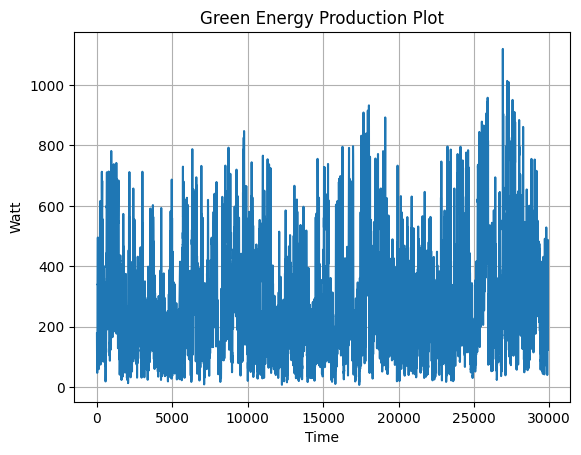

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

cleaned_merge['Production_simulate_half'].plot(kind='line')

# Customize the plot for better readability
plt.title('Green Energy Production Plot')
plt.xlabel('Time')
plt.ylabel('Watt')
plt.grid(True)
plt.show()

In [29]:
supply_list = cleaned_merge['Production_simulate'].tolist()[:300]
supply_list *= 100

In [31]:
len(supply_list)

30000

In [41]:
cleaned_merge.to_csv('green_energy_supply.csv')

In [26]:
supply = pd.read_csv('green_energy_supply.csv')

In [46]:
power = pd.read_parquet('output/simple/raw-output/0/seed=0/powerSource.parquet')
power

,timestamp,timestamp_absolute,hosts_connected,power_draw,energy_usage,carbon_intensity,carbon_emission
0,1800000,1376316346000,0,201.233627,362377.15625,0.0,0.0
1,3600000,1376318146000,0,201.223770,362315.75000,0.0,0.0
2,5400000,1376319946000,0,201.282883,362397.84375,0.0,0.0
3,7200000,1376321746000,0,201.215012,362330.21875,0.0,0.0
4,9000000,1376323546000,0,201.205170,362359.43750,0.0,0.0
...,...,...,...,...,...,...,...
24048,43288200000,1419602746000,0,200.000000,360007.40625,0.0,0.0
24049,43290000000,1419604546000,0,200.000000,360017.71875,0.0,0.0
24050,43291800000,1419606346000,0,200.059113,360024.34375,0.0,0.0
24051,43293188000,1419607734000,0,201.213882,278049.15625,0.0,0.0


In [34]:
power['power_draw'].describe()

count    144312.000000
mean        223.753082
std          39.154243
min         200.000000
25%         200.627914
50%         201.505722
75%         237.317673
max         314.084839
Name: power_draw, dtype: float64

In [4]:
fragments = pd.read_parquet('workload_traces/bitbrains-small/fragments.parquet')
fragments

,id,duration,cpu_count,cpu_usage
0,1019,300000,1,0.000000
1,1019,300000,1,11.703998
2,1019,600000,1,0.000000
3,1019,300000,1,11.703998
4,1019,900000,1,0.000000
...,...,...,...,...
276974,997,300000,8,10524.798812
276975,997,300000,8,10761.598785
276976,997,300000,8,12289.598612
276977,997,300000,8,10044.798866


In [6]:
tasks = pd.read_parquet('workload_traces/bitbrains-small/tasks.parquet')
tasks

,id,submission_time,duration,cpu_count,cpu_capacity,mem_capacity
0,1019,2013-08-12 13:35:46,2592252000,1,2926.000135,181352
1,1023,2013-08-12 13:35:46,2592252000,1,2925.999560,260096
2,1026,2013-08-12 13:35:46,2592252000,1,2925.999717,249972
3,1052,2013-08-29 14:38:12,577855000,1,2926.000107,131245
4,1073,2013-08-21 11:07:12,1823566000,1,2599.999649,179306
5,1129,2013-08-12 13:35:46,2592252000,1,2925.999494,124928
6,1132,2013-08-20 11:22:04,1909074000,1,2925.999318,191739
7,1138,2013-08-12 13:35:46,2592252000,1,2599.999602,156776
8,1147,2013-08-12 13:35:46,2592252000,1,2599.999649,103484
9,1152,2013-08-12 13:35:46,2592252000,1,2925.999560,195624


In [7]:
host = pd.read_parquet('output/simple/raw-output/0/seed=0/host.parquet')
host

,timestamp,timestamp_absolute,host_id,host_name,core_count,mem_capacity,guests_terminated,guests_running,guests_error,guests_invalid,...,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,power_draw,energy_usage,uptime,downtime,boot_time,boot_time_absolute
0,30000000,1376344546000,bb20b45f-d4d9-5138-0000-000000000000,H01,12,140457600000,0,8,0,0,...,195736,29804264,0,0,201.243332,6039146.5,30000000,0,1376314546000,NaN
1,60000000,1376374546000,bb20b45f-d4d9-5138-0000-000000000000,H01,12,140457600000,0,8,0,0,...,194218,29805782,0,0,201.351837,6038843.0,30000000,0,1376314546000,NaN
2,90000000,1376404546000,bb20b45f-d4d9-5138-0000-000000000000,H01,12,140457600000,0,8,0,0,...,195446,29804554,0,0,201.426270,6039089.0,30000000,0,1376314546000,NaN
3,120000000,1376434546000,bb20b45f-d4d9-5138-0000-000000000000,H01,12,140457600000,0,8,0,0,...,184557,29815443,0,0,201.028931,6036911.0,30000000,0,1376314546000,NaN
4,150000000,1376464546000,bb20b45f-d4d9-5138-0000-000000000000,H01,12,140457600000,0,8,0,0,...,188840,29811160,0,0,201.117599,6037767.0,30000000,0,1376314546000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,43230000000,1419544546000,bb20b45f-d4d9-5138-0000-000000000000,H01,12,140457600000,0,1,0,0,...,3345,29996655,0,0,200.000000,6000668.0,30000000,0,1376314546000,NaN
1441,43260000000,1419574546000,bb20b45f-d4d9-5138-0000-000000000000,H01,12,140457600000,0,1,0,0,...,1246,29998754,0,0,200.000000,6000248.5,30000000,0,1376314546000,NaN
1442,43290000000,1419604546000,bb20b45f-d4d9-5138-0000-000000000000,H01,12,140457600000,0,1,0,0,...,1068,29998932,0,0,200.000000,6000213.0,30000000,0,1376314546000,NaN
1443,43293188000,1419607734000,bb20b45f-d4d9-5138-0000-000000000000,H01,12,140457600000,0,0,0,0,...,2368,3185632,0,0,201.213882,638073.5,3188000,0,1376314546000,NaN


In [9]:
output_task = pd.read_parquet('output/simple/raw-output/0/seed=0/task.parquet')
output_task

,timestamp,timestamp_absolute,task_id,host_id,task_name,cpu_count,mem_capacity,cpu_limit,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,uptime,downtime,provision_time,boot_time,creation_time,finish_time,boot_time_absolute,task_state
0,30000000,1376344546000,00000000-0000-0000-6e78-9e6aa1b965f4,bb20b45f-d4d9-5138-0000-000000000000,1019,1,181,0.0,3,0,0,0,30000000,0,0,0.000000e+00,0,NaN,1.376315e+12,RUNNING
1,30000000,1376344546000,00000000-0000-0000-f88b-b8a8724c81ec,bb20b45f-d4d9-5138-0000-000000000000,1023,1,260,0.0,2,0,0,0,30000000,0,0,0.000000e+00,0,NaN,1.376315e+12,RUNNING
2,30000000,1376344546000,00000000-0000-0000-53cb-9f0c747ea2ea,bb20b45f-d4d9-5138-0000-000000000000,1026,1,250,0.0,20,0,0,0,30000000,0,0,0.000000e+00,0,NaN,1.376315e+12,RUNNING
3,30000000,1376344546000,00000000-0000-0000-c584-133ac916ab3c,bb20b45f-d4d9-5138-0000-000000000000,1129,1,125,0.0,3,0,0,0,30000000,0,0,0.000000e+00,0,NaN,1.376315e+12,RUNNING
4,30000000,1376344546000,00000000-0000-0000-f3b8-488c368cb0a6,bb20b45f-d4d9-5138-0000-000000000000,1138,1,157,0.0,18,0,0,0,30000000,0,0,0.000000e+00,0,NaN,1.376315e+12,RUNNING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41233,43230000000,1419544546000,00000000-28b8-7810-8086-d193a6f2b568,bb20b45f-d4d9-5138-0000-000000000000,1132,1,192,0.0,1,0,0,0,30000000,0,683178000,4.138580e+10,683178000,NaN,1.417700e+12,RUNNING
41234,43230000000,1419544546000,00000000-2dd1-37b0-d9dc-cac414d23c6f,bb20b45f-d4d9-5138-0000-000000000000,1073,1,179,0.0,-169,0,0,0,-1814203000,0,768686000,NaN,768686000,4.320769e+10,NaN,COMPLETED
41235,43260000000,1419574546000,00000000-28b8-7810-8086-d193a6f2b568,bb20b45f-d4d9-5138-0000-000000000000,1132,1,192,0.0,1,0,0,0,30000000,0,683178000,4.138580e+10,683178000,NaN,1.417700e+12,RUNNING
41236,43290000000,1419604546000,00000000-28b8-7810-8086-d193a6f2b568,bb20b45f-d4d9-5138-0000-000000000000,1132,1,192,0.0,1,0,0,0,30000000,0,683178000,4.138580e+10,683178000,NaN,1.417700e+12,RUNNING


In [48]:
import numpy as np

q101010 = np.load('q_learning_10_10_10.csv.npy')
q101010

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.27704287e+08, -2.28806729e+08, -1.24315998e+08],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
      shape=(1000, 3))

np.float64(0.0)